![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [123]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [124]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [126]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [131]:
# size => int, price => int

# df['size'] = df['size'].astype(dtype='float') => 'Площадьземли:1сот' is not number format
# df['price'] = df['price'].astype(dtype='int') => 'Договорная' is not number format

In [132]:
df[df['size'] == 'Площадьземли:1сот']

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000


In [133]:
# 'Площадьземли:1сот' = 100kv.km
df.iat[5347, 3] = 100

In [135]:
# 'Договорная' all as this must delete

df.drop(df[df['price'] == 'Договорная'].index, axis=0, inplace=True)

In [137]:
df['size'] = df['size'].astype(dtype='float')
df['size'] = df['size'].map(lambda x: np.around(x))
df['size'] = df['size'].astype(dtype='int')


df['price'] = df['price'].astype(dtype='int')

In [138]:
df.describe()

,rooms,size,level,max_levels,price
count,7466.000000,7466.000000,7466.000000,7466.000000,7.466000e+03
mean,2.622288,113.535092,3.693678,6.023841,7.133421e+04
std,1.083200,1501.057482,2.236770,2.606955,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [ ]:
# rooms => min[1], max[10] 
# size => min[1], max[70000]
# level => min[1], max[19]
# max_levels => min[1], max[25]

# price => min[2], max[52_000_000]

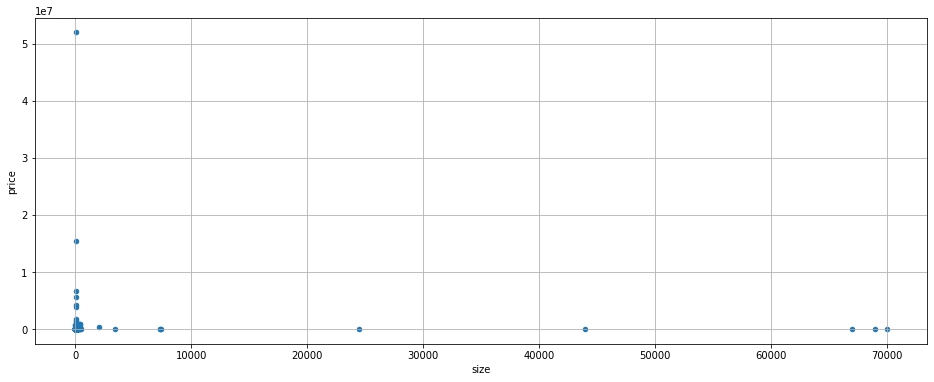

In [140]:
df.plot(kind='scatter', x='size', y='price', figsize=(16, 6))
plt.grid()
plt.show()

In [145]:
idx = df[(df['size'] < 14) | (df['size'] > 500)].index
df.drop(idx, axis=0, inplace=True)

In [152]:
idx1 = df[(df['price'] < 15000) & (df['rooms'] != 1)].index
df.drop(idx1, axis=0, inplace=True)

In [158]:
idx2 = df[df['price'] > 800000].index
df.drop(idx2, axis=0, inplace=True)

In [161]:
for i in range(df.shape[0]):
  if df.iat[i, 4] > df.iat[i, 5]:
    print(df.loc[i])

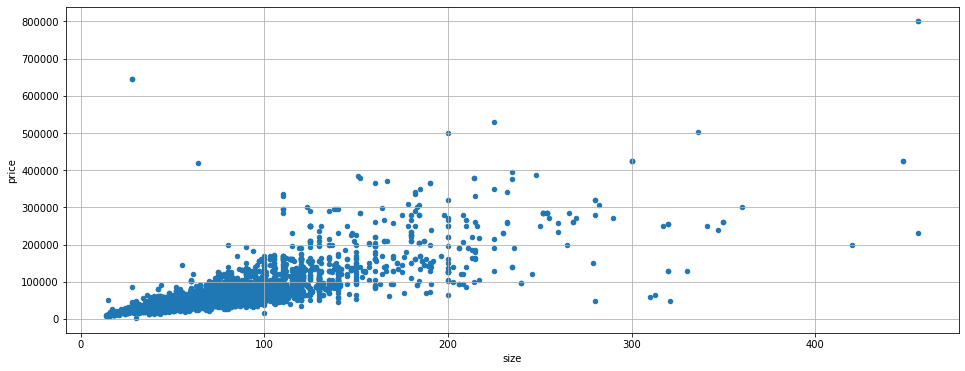

In [159]:
df.plot(kind='scatter', x='size', y='price', figsize=(16, 6))
plt.grid()
plt.show()

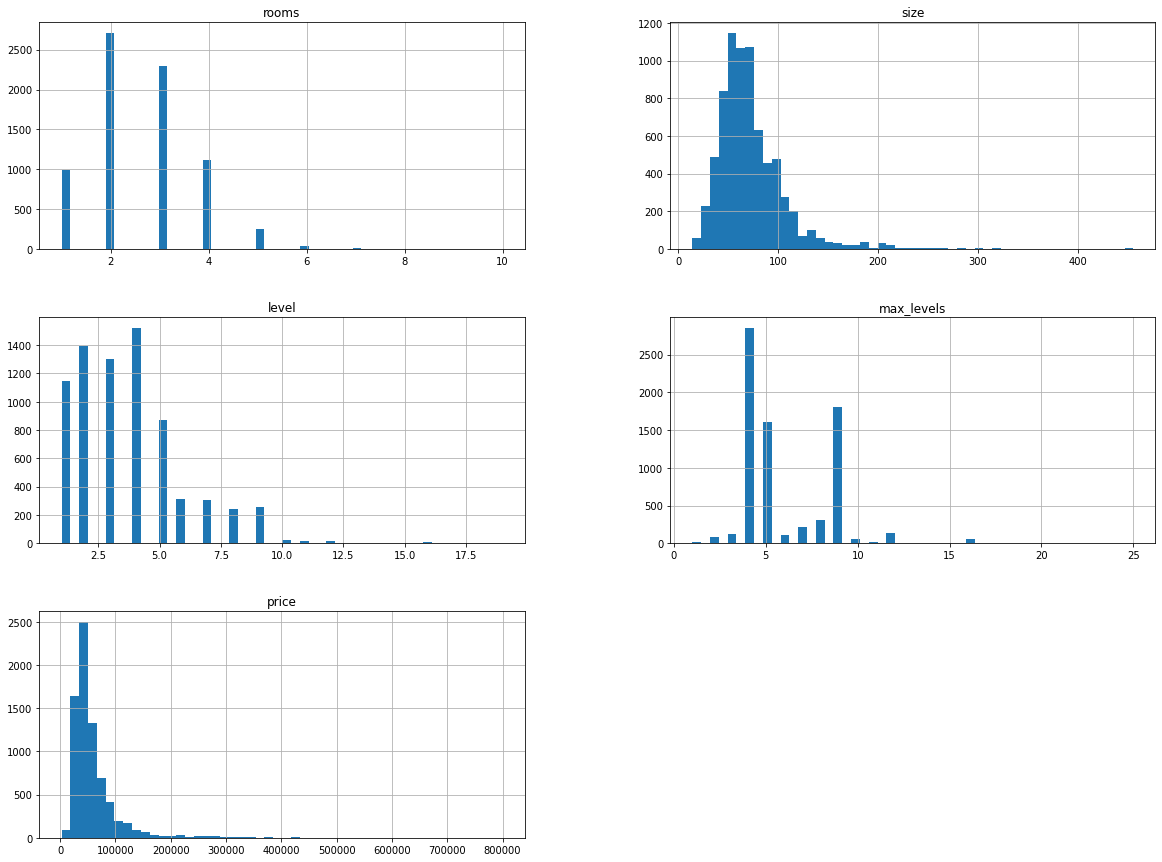

In [160]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [162]:
df.describe()

,rooms,size,level,max_levels,price
count,7429.000000,7429.000000,7429.000000,7429.000000,7429.000000
mean,2.618791,73.120743,3.698210,6.030017,59100.545161
std,1.077279,37.005837,2.238096,2.607162,46705.099896
min,1.000000,14.000000,1.000000,1.000000,2400.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,66847.000000
max,10.000000,456.000000,19.000000,25.000000,800000.000000


In [168]:
idx3 = df[df['price'] < 10000].index
df.drop(idx3, axis=0, inplace=True)

In [170]:
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


In [181]:
df['district'].value_counts()

Чиланзарский         1629
Мирзо-Улугбекский    1360
Юнусабадский          873
Учтепинский           870
Мирабадский           767
Яккасарайский         647
Яшнободский           463
Шайхантахурский       371
Олмазорский           264
Сергелийский          159
Янгихаётский           14
Бектемирский            8
Name: district, dtype: int64

In [182]:
df.drop('location', axis=1, inplace=True)

In [183]:
df

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500
7561,Яшнободский,2,49,1,4,32000
7562,Шайхантахурский,2,64,3,9,40000
7563,Мирзо-Улугбекский,1,18,1,4,11000


In [184]:
df.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.787775,0.139722,0.185012,0.552788
size,0.787775,1.000000,0.160931,0.276414,0.781795
level,0.139722,0.160931,1.000000,0.592970,0.059206
max_levels,0.185012,0.276414,0.592970,1.000000,0.219857
price,0.552788,0.781795,0.059206,0.219857,1.000000


In [185]:
df['size_per_room'] = df['size']/df['rooms']
df

,district,rooms,size,level,max_levels,price,size_per_room
0,Юнусабадский,3,57,4,4,52000,19.000000
1,Яккасарайский,2,52,4,5,56000,26.000000
2,Чиланзарский,2,42,4,4,37000,21.000000
3,Чиланзарский,3,65,1,4,49500,21.666667
4,Чиланзарский,3,70,3,5,55000,23.333333
...,...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500,38.000000
7561,Яшнободский,2,49,1,4,32000,24.500000
7562,Шайхантахурский,2,64,3,9,40000,32.000000
7563,Мирзо-Улугбекский,1,18,1,4,11000,18.000000


In [186]:
df.corr()

,rooms,size,level,max_levels,price,size_per_room
rooms,1.000000,0.787775,0.139722,0.185012,0.552788,-0.228834
size,0.787775,1.000000,0.160931,0.276414,0.781795,0.353744
level,0.139722,0.160931,1.000000,0.592970,0.059206,0.094641
max_levels,0.185012,0.276414,0.592970,1.000000,0.219857,0.219860
price,0.552788,0.781795,0.059206,0.219857,1.000000,0.337734
size_per_room,-0.228834,0.353744,0.094641,0.219860,0.337734,1.000000


In [187]:
df['size_per_room'] = df['size_per_room'].map(lambda x: np.around(x))
df.corr()

,rooms,size,level,max_levels,price,size_per_room
rooms,1.000000,0.787775,0.139722,0.185012,0.552788,-0.229110
size,0.787775,1.000000,0.160931,0.276414,0.781795,0.353422
level,0.139722,0.160931,1.000000,0.592970,0.059206,0.094192
max_levels,0.185012,0.276414,0.592970,1.000000,0.219857,0.218914
price,0.552788,0.781795,0.059206,0.219857,1.000000,0.337506
size_per_room,-0.229110,0.353422,0.094192,0.218914,0.337506,1.000000


In [189]:
df.corrwith(df['price']).sort_values(ascending=False)

price            1.000000
size             0.781795
rooms            0.552788
size_per_room    0.337506
max_levels       0.219857
level            0.059206
dtype: float64

# Train_set, Test_set

In [190]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=27)

In [191]:
train_set

,district,rooms,size,level,max_levels,price,size_per_room
7103,Учтепинский,2,56,6,9,39500,28.0
2898,Мирзо-Улугбекский,4,93,3,4,56700,23.0
338,Чиланзарский,2,75,4,12,60000,38.0
1283,Юнусабадский,1,38,5,5,23500,38.0
3753,Юнусабадский,3,78,4,4,48000,26.0
...,...,...,...,...,...,...,...
4939,Чиланзарский,4,105,4,6,60000,26.0
6807,Юнусабадский,2,63,9,9,43000,32.0
3983,Мирабадский,3,65,1,2,48000,22.0
3839,Мирзо-Улугбекский,3,75,4,5,47000,25.0


In [192]:
test_set

,district,rooms,size,level,max_levels,price,size_per_room
5341,Мирабадский,3,65,1,2,48000,22.0
4735,Юнусабадский,4,90,9,9,45000,22.0
1182,Чиланзарский,2,42,3,4,35500,21.0
2035,Чиланзарский,3,97,1,8,72750,32.0
6286,Учтепинский,2,52,2,4,35000,26.0
...,...,...,...,...,...,...,...
6893,Мирабадский,3,135,3,8,88000,45.0
4196,Мирзо-Улугбекский,2,50,4,4,35000,25.0
4374,Учтепинский,2,51,1,4,35500,26.0
3918,Шайхантахурский,3,45,2,5,28000,15.0


In [193]:
X_train = train_set.drop('price', axis=1)
y = train_set['price'].copy()

X_num = X_train.drop("district", axis=1)

# Pipeline: num_pipeline, full_pipeline

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('std_scaler', StandardScaler())
])


In [195]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
              ('num', num_pipeline, num_attribs),
              ('cat', OneHotEncoder(), cat_attribs)
])

In [196]:
X_prepared = full_pipeline.fit_transform(X_train)

# LinearRegression

In [197]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [198]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [199]:
X_test = test_set.drop('price', axis=1)
X_test

,district,rooms,size,level,max_levels,size_per_room
5341,Мирабадский,3,65,1,2,22.0
4735,Юнусабадский,4,90,9,9,22.0
1182,Чиланзарский,2,42,3,4,21.0
2035,Чиланзарский,3,97,1,8,32.0
6286,Учтепинский,2,52,2,4,26.0
...,...,...,...,...,...,...
6893,Мирабадский,3,135,3,8,45.0
4196,Мирзо-Улугбекский,2,50,4,4,25.0
4374,Учтепинский,2,51,1,4,26.0
3918,Шайхантахурский,3,45,2,5,15.0


In [200]:
y_test = test_set['price'].copy()
y_test

5341     48000
4735     45000
1182     35500
2035     72750
6286     35000
         ...  
6893     88000
4196     35000
4374     35500
3918     28000
3650    131500
Name: price, Length: 1485, dtype: int64

In [201]:
X_test_prepared = full_pipeline.transform(X_test)

In [202]:
y_predicted = LR_model.predict(X_test_prepared)

In [203]:
y_predicted

array([ 67430.3395729 ,  61105.42043389,  29350.04383168, ...,
        37331.27796801,  28455.13468751, 108282.26141047])

In [204]:
y_test[:10]

5341    48000
4735    45000
1182    35500
2035    72750
6286    35000
2274    76000
7389    43000
1628    33500
184     43500
7321    62000
Name: price, dtype: int64

In [205]:
y_predicted[:10]

array([67430.3395729 , 61105.42043389, 29350.04383168, 87873.88367034,
       36626.22161701, 77642.46321551, 64731.36241625, 52490.20714418,
       52932.10640244, 51046.17501874])

### MAE

In [207]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predicted)
mae

15009.978974594336

### RMSE

In [208]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)

print("RMSE=", np.sqrt(mse))

RMSE= 32164.865927743853


# RandomForestRegressor

In [209]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [210]:
y_predicted = RF_model.predict(X_test_prepared)

### MAE

In [211]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predicted)
mae

11142.590689820698

### RMSE

In [212]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)

print("RMSE=", np.sqrt(mse))

RMSE= 24545.059466381437


# DesicionTreeRegressor

In [213]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [214]:
y_predicted = DT_model.predict(X_test_prepared)

### MAE

In [215]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predicted)
mae

11141.300292584332

### RMSE

In [216]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predicted)

print("RMSE=", np.sqrt(mse))

RMSE= 25070.938632711906


# Cross-Validation

In [217]:
df

,district,rooms,size,level,max_levels,price,size_per_room
0,Юнусабадский,3,57,4,4,52000,19.0
1,Яккасарайский,2,52,4,5,56000,26.0
2,Чиланзарский,2,42,4,4,37000,21.0
3,Чиланзарский,3,65,1,4,49500,22.0
4,Чиланзарский,3,70,3,5,55000,23.0
...,...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500,38.0
7561,Яшнободский,2,49,1,4,32000,24.0
7562,Шайхантахурский,2,64,3,9,40000,32.0
7563,Мирзо-Улугбекский,1,18,1,4,11000,18.0


In [218]:
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = full_pipeline.transform(X)

In [219]:
from sklearn.model_selection import cross_val_score

mse_scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)

In [220]:
def display_scores(scores):
   print("Scores:", scores)
   print("Mean:", scores.mean())
   print("Std.dev:", scores.std())

In [221]:
display_scores(np.sqrt(-mse_scores))

Scores: [19416.7753538  29033.56630493 30176.86977455 32070.30013474
 25647.31915941]
Mean: 27268.9661454862
Std.dev: 4447.677247541859


In [222]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
RF_rmse_scores = np.sqrt(-scores)
display_scores(RF_rmse_scores)

Scores: [16321.67428006 35365.54595666 26378.20766231 25311.70902259
 25490.12245019 23115.28061922 26241.0336476  22095.17568284
 19809.45266006 16074.53743336]
Mean: 23620.273941489373
Std.dev: 5348.778167918792


In [224]:
import pickle

filename = "uyborRF_model.pkl" # faylga istalgan nom beramiz

with open(filename, 'wb') as file:
  pickle.dump(RF_model, file)

In [225]:
filename = "uyborLR_model.pkl" # faylga istalgan nom beramiz

with open(filename, 'wb') as file:
  pickle.dump(LR_model, file)

In [226]:
filename = "uyborDT_model.pkl" # faylga istalgan nom beramiz

with open(filename, 'wb') as file:
  pickle.dump(DT_model, file)

In [227]:
filename = "uyborfull_pipeline.pkl" # faylga istalgan nom beramiz

with open(filename, 'wb') as file:
  pickle.dump(full_pipeline, file)